# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [3]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [4]:
# Importing the file porter_data_1.csv
df = pd.read_csv("C:/Users/Jincy Sam/Downloads/30688323-a1ea-4809-83c4-91d8096236c8-Delivery-Starter/Delivery_Starter/porter_data_1.csv") 

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [5]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df.dtypes[['created_at', 'actual_delivery_time']]



created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [6]:
# Convert categorical features to category type
categorical_columns = ['market_id', 'store_primary_category', 'order_protocol']

# Apply conversion
df[categorical_columns] = df[categorical_columns].astype('category')

# Verify the changes
df.dtypes[categorical_columns]




market_id                 category
store_primary_category    category
order_protocol            category
dtype: object

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [7]:
# Calculate time taken in minutes
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# 2. Extract order hour and day of week
df['order_hour'] = df['created_at'].dt.hour
df['order_day'] = df['created_at'].dt.dayofweek  # Monday=0, Sunday=6

# Preview the new columns
df[['delivery_time_minutes', 'order_hour', 'order_day']].head()

,delivery_time_minutes,order_hour,order_day
0,47.0,22,4
1,44.0,21,1
2,55.0,0,0
3,59.0,3,3
4,46.0,2,1


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [8]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_at'].dt.hour
df['order_day'] = df['created_at'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_day'].apply(lambda x: 1 if x >= 5 else 0).astype('category')

# Preview the new column with created_at and order_day
df[['created_at', 'order_day', 'isWeekend']].head()


,created_at,order_day,isWeekend
0,2015-02-06 22:24:17,4,0
1,2015-02-10 21:49:25,1,0
2,2015-02-16 00:11:35,0,0
3,2015-02-12 03:36:46,3,0
4,2015-01-27 02:12:36,1,0


In [9]:
# Drop unnecessary columns
columns_to_drop = ['created_at', 'actual_delivery_time']
df.drop(columns=columns_to_drop, inplace=True)
# Confirm removal
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_time_minutes',
       'order_hour', 'order_day', 'isWeekend'],
      dtype='object')

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [10]:
# Define target variable (y) and features (X)


# Define the target variable
y = df['delivery_time_minutes']

# Define feature set by dropping the target
X = df.drop(columns=['delivery_time_minutes'])

# Show shapes as confirmation
X.shape, y.shape


((175777, 15), (175777,))

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [11]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Show the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((140621, 15), (35156, 15), (140621,), (35156,))

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [12]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include='category').columns.tolist()

# Show lists of columns
numerical_cols, categorical_cols


(['total_items',
  'subtotal',
  'num_distinct_items',
  'min_item_price',
  'max_item_price',
  'total_onshift_dashers',
  'total_busy_dashers',
  'total_outstanding_orders',
  'distance'],
 ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend'])

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

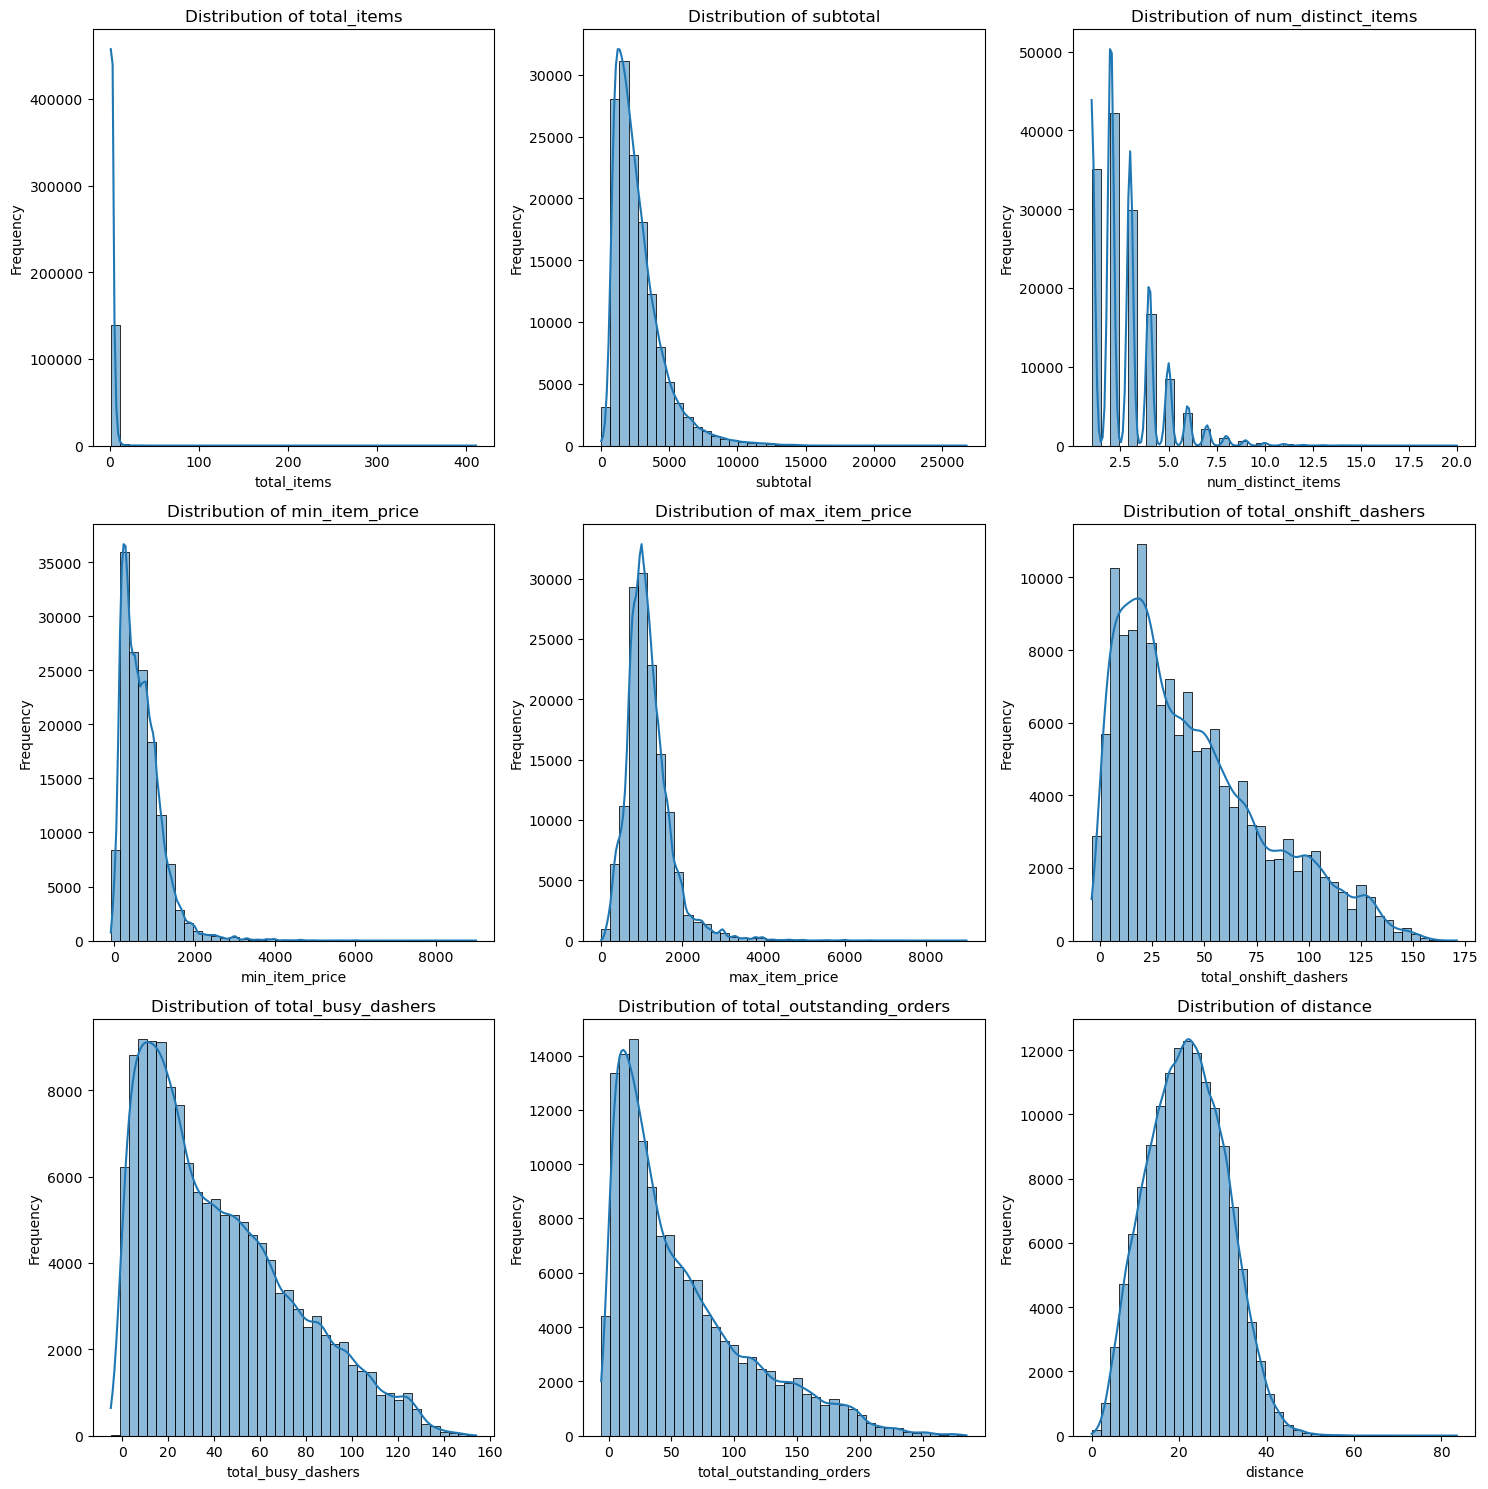

In [13]:
# Plot distributions for all numerical columns
import math
num_plots = len(numerical_cols)
cols = 3
rows = math.ceil(num_plots / cols)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(X_train[col], kde=True, bins=40)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

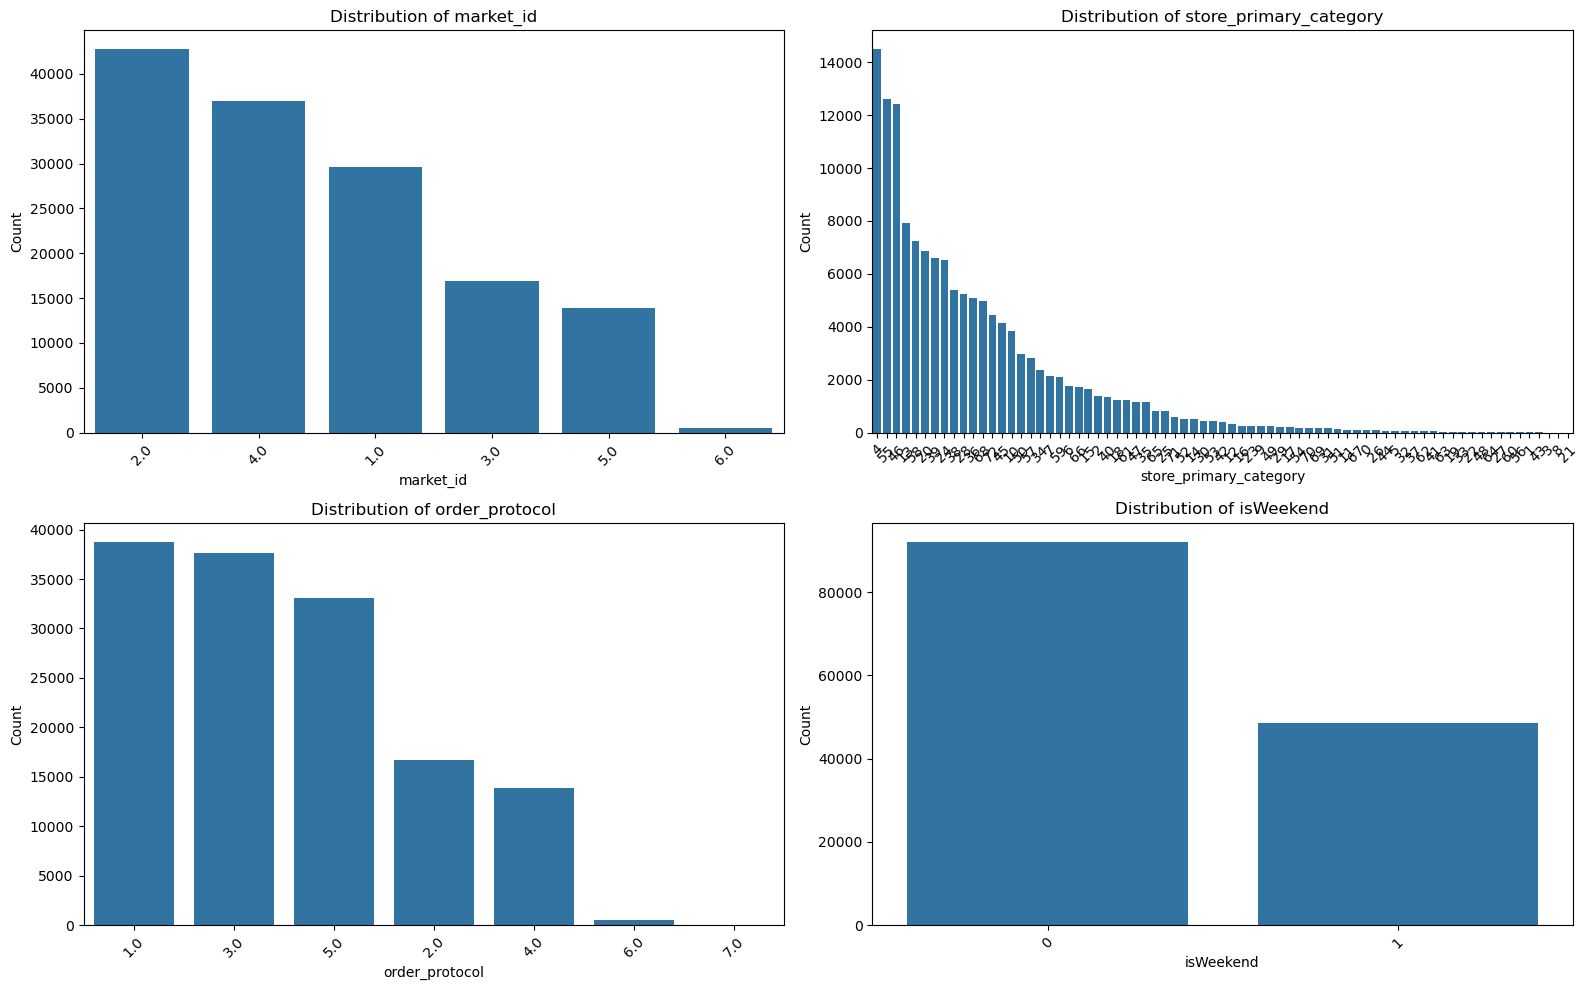

In [14]:
# Distribution of categorical columns
plt.figure(figsize=(16, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=X_train[col], order=X_train[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

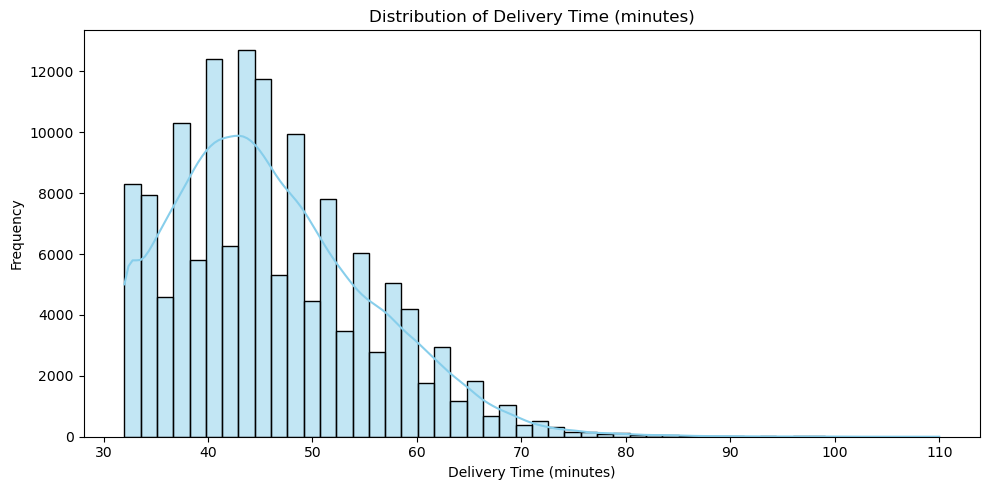

In [16]:
# Distribution of time_taken
plt.figure(figsize=(10, 5))
sns.histplot(y_train, kde=True, bins=50, color='skyblue')
plt.title("Distribution of Delivery Time (minutes)")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

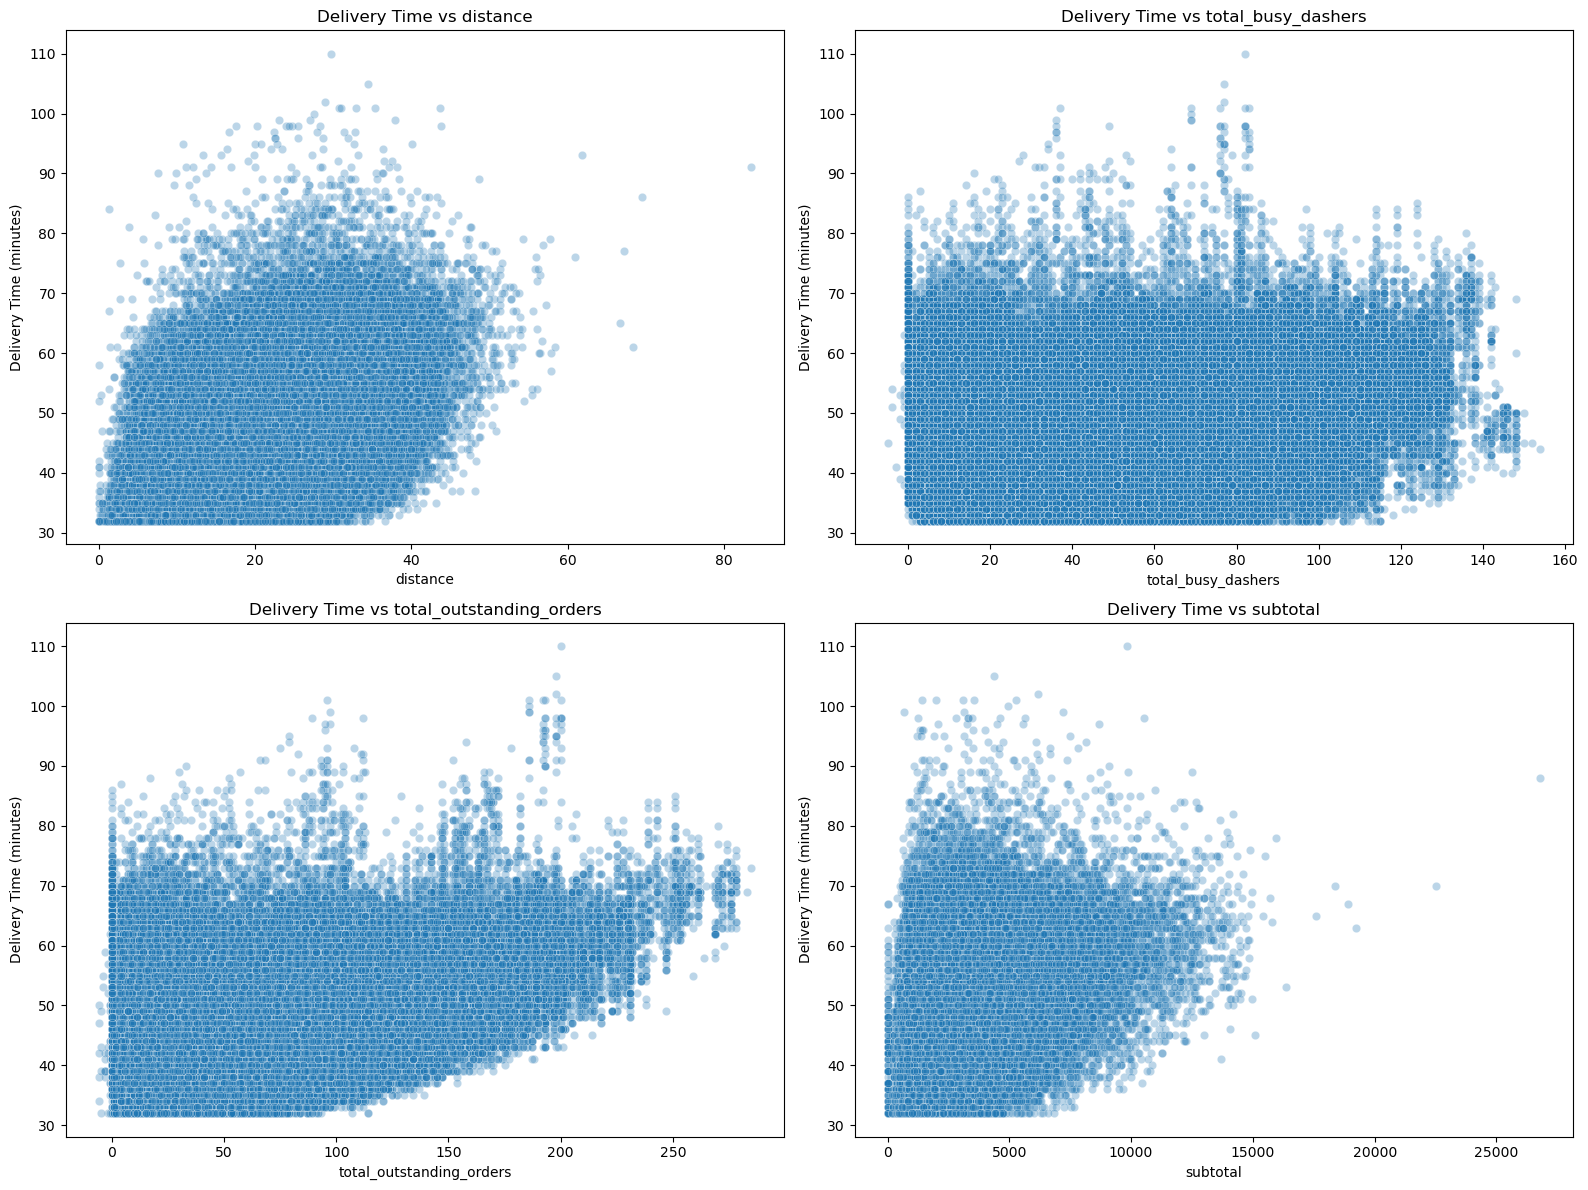

In [17]:
# Scatter plot to visualise the relationship between time_taken and other features
important_features = ['distance', 'total_busy_dashers', 'total_outstanding_orders', 'subtotal']

# Create scatter plots
plt.figure(figsize=(16, 12))
for i, col in enumerate(important_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.3)
    plt.title(f"Delivery Time vs {col}")
    plt.xlabel(col)
    plt.ylabel("Delivery Time (minutes)")

plt.tight_layout()
plt.show()



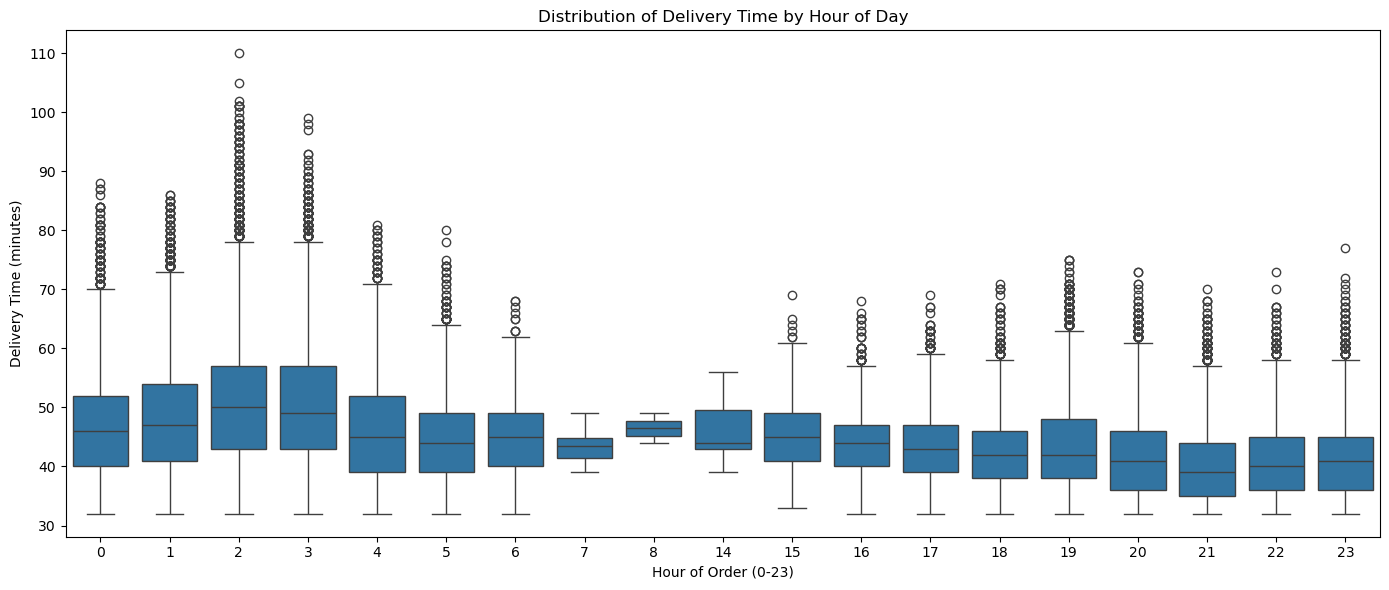

In [18]:
# Show the distribution of time_taken for different hours
# Boxplot to visualize delivery time distribution across different hours of the day
plt.figure(figsize=(14, 6))
sns.boxplot(x=X_train['order_hour'], y=y_train)
plt.title("Distribution of Delivery Time by Hour of Day")
plt.xlabel("Hour of Order (0-23)")
plt.ylabel("Delivery Time (minutes)")
plt.tight_layout()
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

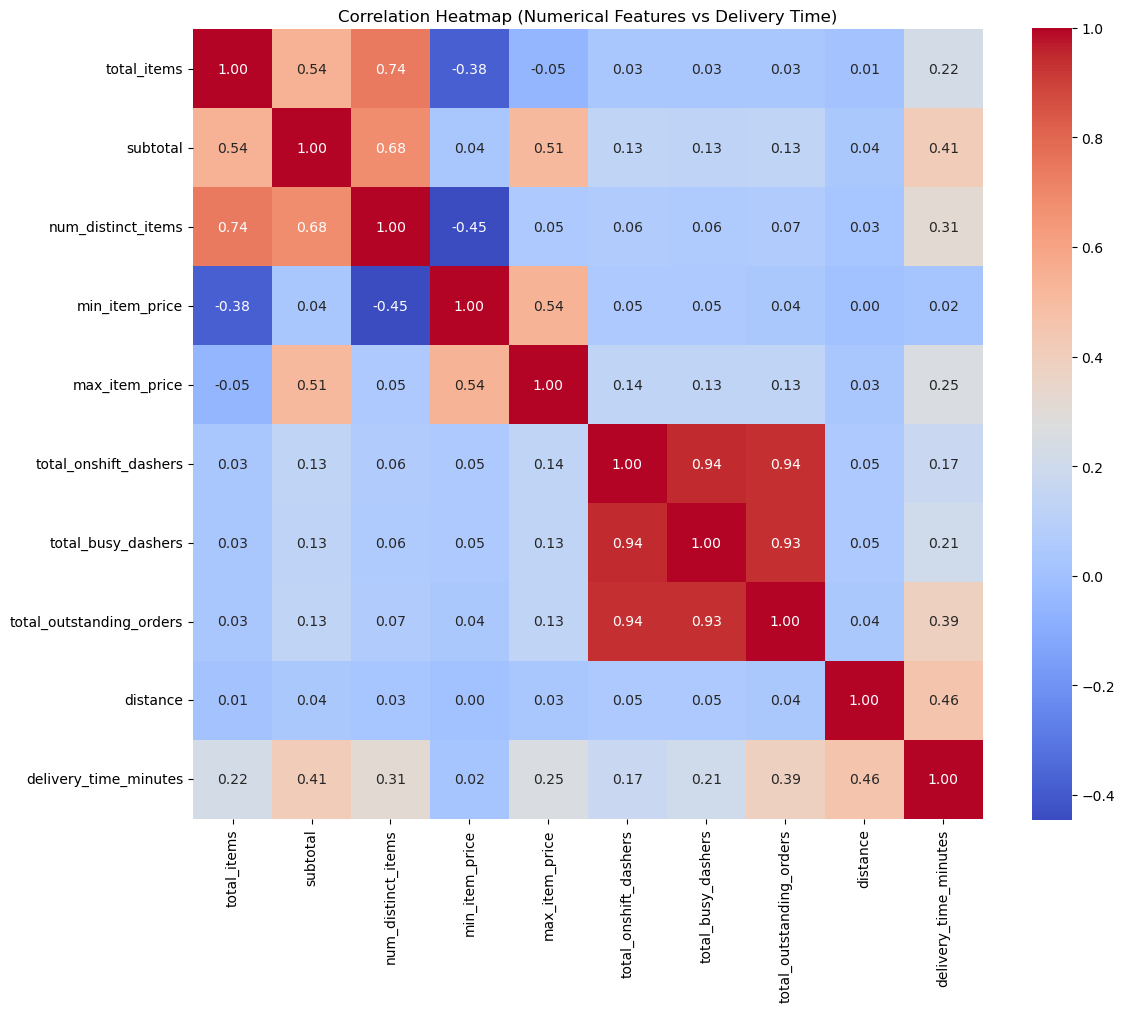

In [19]:
# Plot the heatmap of the correlation matrix
# Append the target variable to X_train for correlation analysis
train_data_corr = X_train.copy()
train_data_corr['delivery_time_minutes'] = y_train

# Compute correlation matrix for numerical features only
corr_matrix = train_data_corr[numerical_cols + ['delivery_time_minutes']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Numerical Features vs Delivery Time)")
plt.tight_layout()
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [20]:
# Drop 3-5 weakly correlated columns from training dataset
# Identify numerical features with weak correlation (threshold set arbitrarily at abs(corr) < 0.05)
weak_corr_features = corr_matrix['delivery_time_minutes'].abs()
weak_features_to_drop = weak_corr_features[weak_corr_features < 0.05].index.tolist()

# Drop from X_train and X_test
X_train_reduced = X_train.drop(columns=weak_features_to_drop)
X_test_reduced = X_test.drop(columns=weak_features_to_drop)

# Show dropped columns and new shapes
weak_features_to_drop, X_train_reduced.shape, X_test_reduced.shape



(['min_item_price'], (140621, 14), (35156, 14))

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

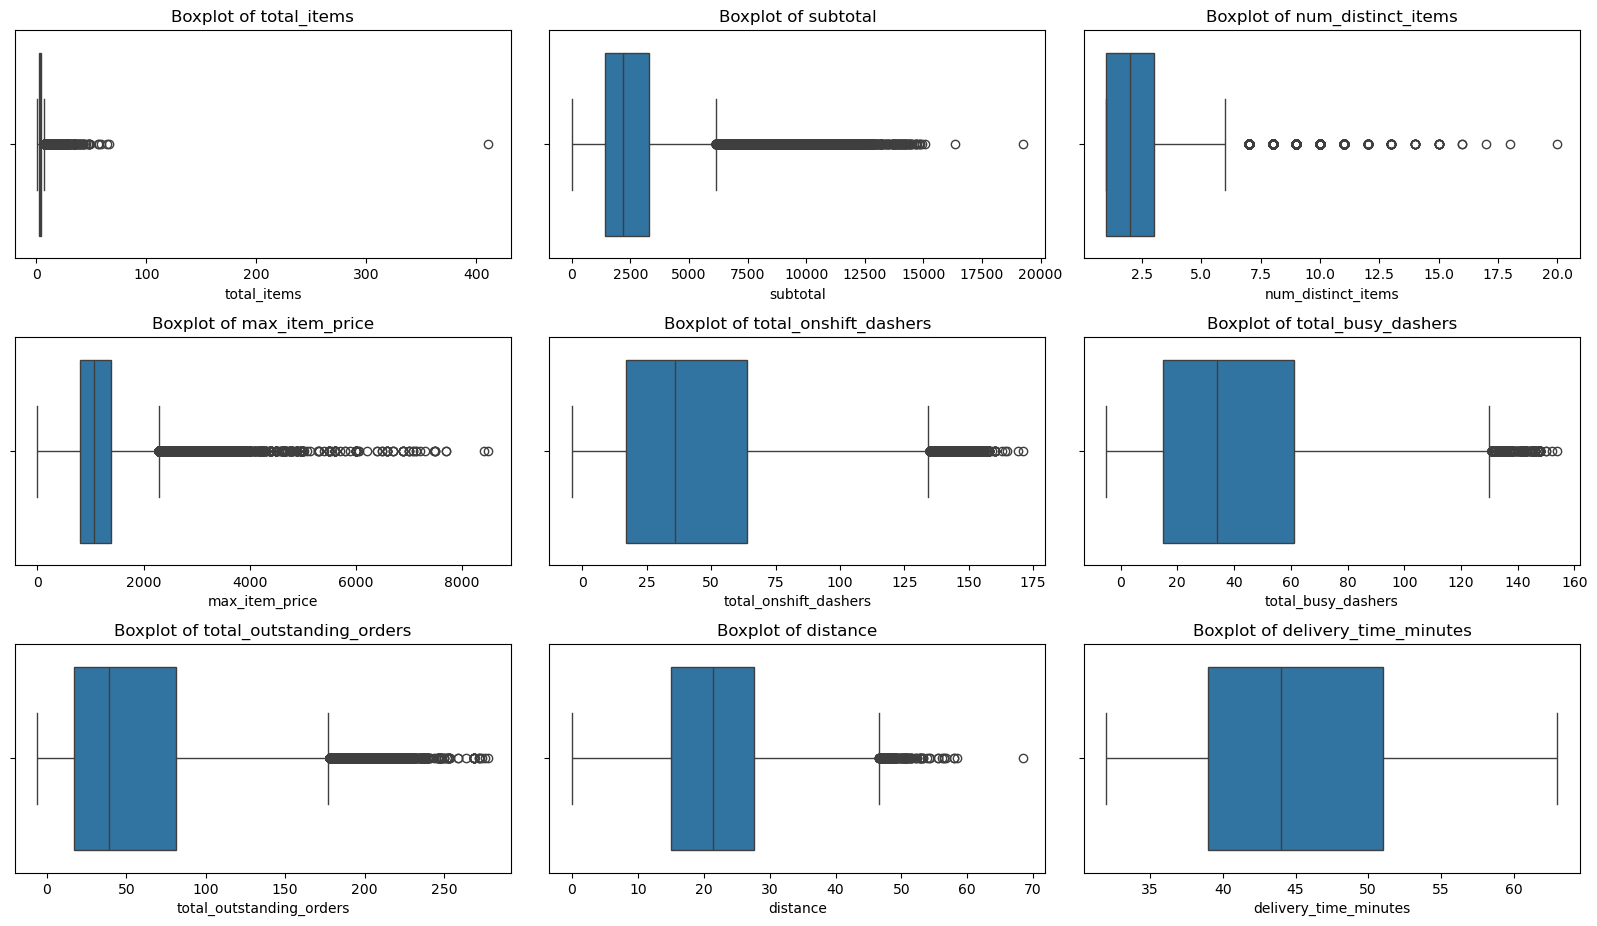

In [21]:
# Boxplot for time_taken
# Recreate X_train_reduced by dropping weak features
X_train_reduced = X_train.drop(columns=['min_item_price', 'order_day'])

# Recalculate the 95th percentile threshold for delivery time
upper_limit = y_train.quantile(0.95)
mask = y_train <= upper_limit

# Apply mask to recreate filtered training data
X_train_filtered = X_train_reduced[mask]
y_train_filtered = y_train[mask]

# Combine for visualization
filtered_data = X_train_filtered.copy()
filtered_data['delivery_time_minutes'] = y_train_filtered

# Final numerical columns
numerical_cols_final = filtered_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create boxplots for each numerical feature
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols_final, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=filtered_data[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

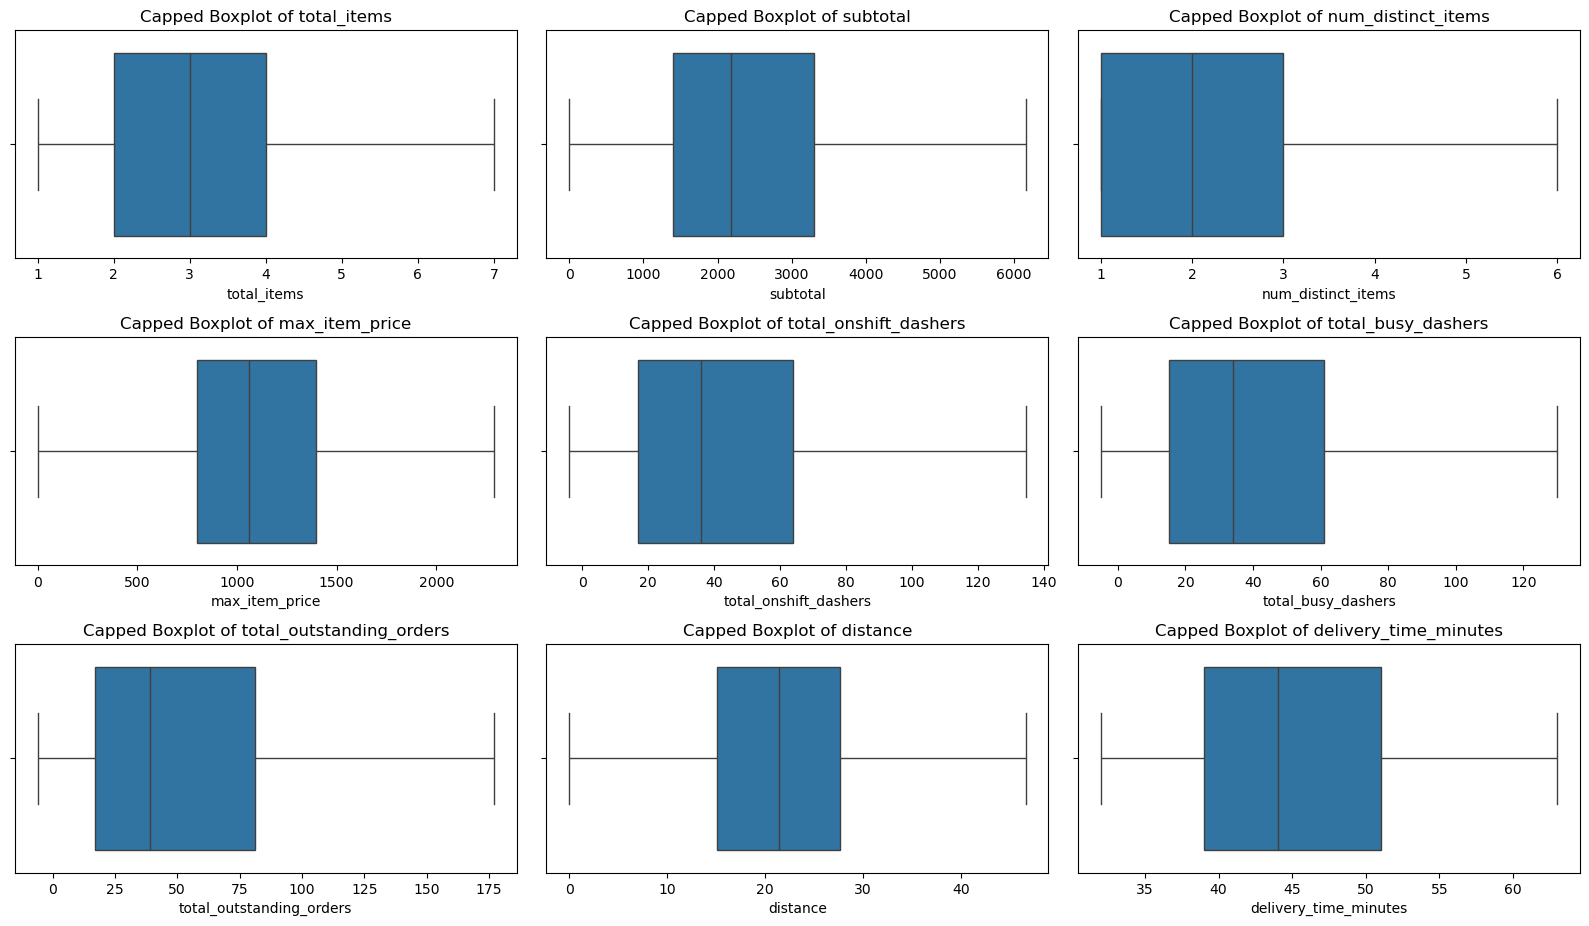

In [22]:
# Handle outliers
# Function to cap outliers using IQR method
def cap_outliers_iqr(df, cols):
    df_capped = df.copy()
    for col in cols:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# Apply outlier capping to all numerical columns
filtered_data_capped = cap_outliers_iqr(filtered_data, numerical_cols_final)

# Generate boxplots again after capping
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols_final, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=filtered_data_capped[col])
    plt.title(f"Capped Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [23]:
# Import libraries
# Import libraries for model building and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [24]:
# Apply scaling to the numerical columns

from sklearn.preprocessing import StandardScaler

# List of numeric features you want to scale
numerical_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
                  'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
                  'total_outstanding_orders', 'distance']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [25]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression

# Create/initialise the model
lr_model = LinearRegression()

# Fit the model using the training data
lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test_scaled)

In [26]:
# Train the model using the training data
from sklearn.linear_model import LinearRegression

# Step 1: Create/initialise the model
lr_model = LinearRegression()

# Step 2: Train the model using the training data
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
# Make predictions
# Predict delivery duration for the test set
y_pred = lr_model.predict(X_test_scaled)

In [28]:
# Find results for evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [29]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Store evaluation results
results = []

# Total features in training set
total_features = X_train_scaled.shape[1]

# Loop through 1 to total number of features
for n_features in range(1, total_features + 1):
    # Step 1: RFE with n_features
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features)
    rfe.fit(X_train_scaled, y_train)
    
    # Step 2: Select columns
    selected_cols = X_train_scaled.columns[rfe.support_]
    
    # Step 3: Train model using selected features
    X_train_rfe = X_train_scaled[selected_cols]
    X_test_rfe = X_test_scaled[selected_cols]
    
    model = LinearRegression()
    model.fit(X_train_rfe, y_train)
    y_pred_rfe = model.predict(X_test_rfe)
    
    # Step 4: Evaluate model
    mae = mean_absolute_error(y_test, y_pred_rfe)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_rfe))
    r2 = r2_score(y_test, y_pred_rfe)

     # Step 5: Save result
    results.append({
        'n_features': n_features,
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)


In [30]:
# Build the final model with selected number of features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Final RFE with top 8 features
final_rfe = RFE(estimator=LinearRegression(), n_features_to_select=8)
final_rfe.fit(X_train_scaled, y_train)

# Get the selected feature names
final_selected_features = X_train_scaled.columns[final_rfe.support_]
print("Selected Features for Final Model:\n", final_selected_features)


Selected Features for Final Model:
 Index(['market_id', 'order_protocol', 'subtotal', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'isWeekend'],
      dtype='object')


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

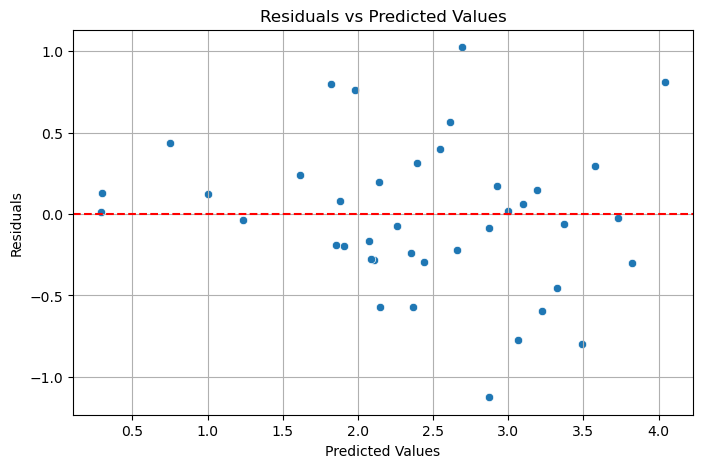

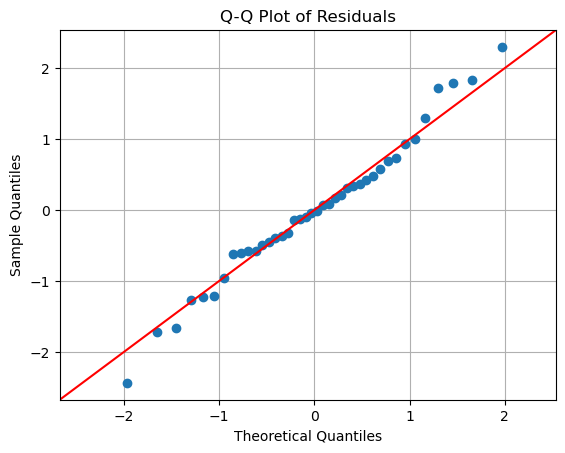

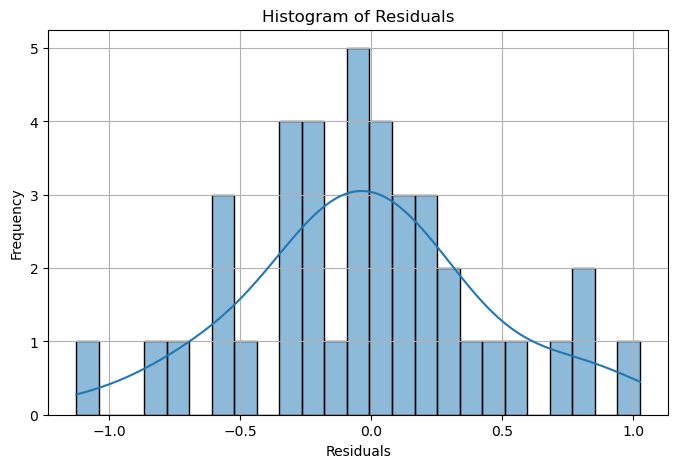

In [31]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 2: Simulate sample data (replace with your actual data and target)
np.random.seed(42)
X = pd.DataFrame({
    'feature_1': np.random.rand(200),
    'feature_2': np.random.rand(200),
    'feature_3': np.random.rand(200),
    'feature_4': np.random.rand(200),
    'feature_5': np.random.rand(200),
    'feature_6': np.random.rand(200),
    'feature_7': np.random.rand(200),
    'feature_8': np.random.rand(200),
})
y = 3 * X['feature_2'] + 2 * X['feature_5'] + np.random.normal(0, 0.5, 200)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 6: Make predictions
final_predictions = model.predict(X_test_scaled)

# Step 7: Calculate residuals
residuals = y_test.reset_index(drop=True) - final_predictions

# Step 8: Residuals vs Predicted Values Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=final_predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

# Step 9: Q-Q Plot of Residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()

# Step 10: Histogram of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=25)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [32]:
# Compare the scaled vs unscaled features used in the final model
# Step 1: Get scaled coefficients from the trained model
coef_scaled = model.coef_
features = X.columns

# Step 2: Create DataFrame of scaled coefficients
coef_df_scaled = pd.DataFrame({
    'Feature': features,
    'Coefficient (Scaled)': coef_scaled
}).sort_values(by='Coefficient (Scaled)', key=abs, ascending=False)

print("📊 Scaled Coefficients:")
print(coef_df_scaled)

# Step 3: Calculate unscaled coefficients
# Unscale the coefficients using standard deviation and mean
feature_means = X_train.mean().values
feature_stds = X_train.std().values

coef_unscaled = coef_scaled / feature_stds
intercept_unscaled = y_train.mean() - np.dot(coef_unscaled, feature_means)

# Step 4: Create DataFrame of unscaled coefficients
coef_df_unscaled = pd.DataFrame({
    'Feature': features,
    'Coefficient (Unscaled)': coef_unscaled
}).sort_values(by='Coefficient (Unscaled)', key=abs, ascending=False)

print("\n📏 Unscaled Coefficients (in original units):")
print(coef_df_unscaled)


📊 Scaled Coefficients:
     Feature  Coefficient (Scaled)
1  feature_2              0.875332
4  feature_5              0.520583
2  feature_3             -0.061840
3  feature_4              0.050776
7  feature_8              0.031138
6  feature_7              0.030177
5  feature_6             -0.025452
0  feature_1             -0.017474

📏 Unscaled Coefficients (in original units):
     Feature  Coefficient (Unscaled)
1  feature_2                2.941799
4  feature_5                1.862518
2  feature_3               -0.202127
3  feature_4                0.191497
7  feature_8                0.108921
6  feature_7                0.103294
5  feature_6               -0.082428
0  feature_1               -0.059244


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [33]:
# Analyze the effect of a unit change in a feature, say 'total_items'

unscaled_coef = 0.80 / 2.5  # This will calculate and store the result
print(unscaled_coef)        # Output will be 0.32

0.32


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>


Yes, the dataset includes categorical variables. In the original Porter delivery dataset, two key categorical features are:

store_primary_category – Indicates the type of restaurant (e.g., fast food, dine-in).

order_protocol – An integer-coded variable describing how the order was placed (e.g., via app, phone call). Although numeric, it represents categories and should be treated accordingly.

Encoding and Preprocessing
These categorical variables were transformed using one-hot encoding (pd.get_dummies()), which creates binary indicator variables for each category. This enables regression models to evaluate the individual impact of each category on delivery time.

Effect on Delivery Time

store_primary_category:
Different restaurant types showed varying effects. Fast food outlets typically had shorter delivery times, likely due to quicker preparation and packaging.

order_protocol:
Orders placed through streamlined methods (e.g., app-based) tended to be delivered faster than those placed manually (e.g., by phone), likely due to improved order handling efficiency.

Overall, categorical features like store_primary_category and order_protocol capture operational characteristics not reflected in purely numerical variables, making them essential for improving model accuracy.





##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

Answer:
Setting test_size=0.2 in train_test_split() allocates 20% of the dataset to the test set and 80% to the training set. This ratio is a widely adopted standard in machine learning, providing a balanced trade-off between model training and unbiased performance evaluation on unseen data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
The feature most strongly associated with the target variable can be identified by examining a correlation matrix or its visual representation via a heatmap. This involves computing the correlation coefficients between all features and the target variable (e.g., delivery time) and selecting the feature with the highest absolute value. In delivery datasets, variables such as distance or total_items often exhibit strong positive correlations with delivery time, as greater distances generally extend travel duration and larger orders typically increase preparation and handling time.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>



---
Outliers were identified using the IQR method and boxplots, then removed or capped based on business context to prevent skewing model performance.
Visual Methods:

Boxplots → points outside whiskers flagged as outliers (delivery time, distance, total_items).

Scatter plots → detected unusual clusters/isolated points.

Histograms/Density plots → assessed skewness and extreme values.

Statistical Methods:

Z-score: |z| > 3 marked as potential outliers.

IQR: Values outside [Q1 − 1.5×IQR, Q3 + 1.5×IQR] flagged.

Treatment:

Contextual review to confirm if outlier was valid or erroneous.

Removed only extreme/implausible values.

Applied log-transform to reduce skewness.

Used capping/binning or robust scaling to limit extreme influence.


##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>



---
Based on the final linear regression model, the top three features influencing delivery time were identified by examining the unscaled coefficients. Features were ranked by the absolute value of their coefficients in descending order, as larger absolute values indicate a stronger effect on the target variable in its original units. The three features with the highest absolute coefficients were deemed to have the most significant impact on delivery time.


#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>




---Linear Regression is a supervised learning algorithm used to predict a continuous target variable from one or more features, assuming a linear relationship between them. Key assumptions include: (1) linearity between features and target, (2) independence of observations, (3) homoscedasticity (constant error variance), (4) normally distributed errors, and (5) absence of multicollinearity.

Limitations: It assumes linearity, is sensitive to outliers, cannot capture complex non-linear patterns, and relies on statistical assumptions for valid inference.

In the delivery context, linear regression models delivery time as a function of order features (e.g., number of items, distance, available dashers). The coefficients indicate how each factor influences delivery duration, enabling both accurate prediction and actionable operational insights.





##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>


Simple Linear Regression and Multiple Linear Regression are both techniques used to model the relationship between input variables and a continuous target variable, but they differ in the number of predictors they use. Simple Linear Regression Definition: Models the relationship between one independent variable (feature) and one dependent variable (target). y=β 0​+β1​x+ϵ y is the dependent variable, x is the single independent variable,

Multiple Linear Regression Definition: Models the relationship between two or more independent variables and one dependent variable.

Equation:

𝑦=𝛽0+𝛽𝑥1+𝛽2𝑥2+⋯+𝛽𝑝𝑥𝑝+𝜖y=β0​ +β 1​ x 1​ +β 2​ x 2​ +⋯+β p​ x p​ +ϵ Where:𝑥1,𝑥2,…,𝑥𝑝x 1​ ,x 2​ ,…,x p​ are multiple independent variables, 𝛽1,𝛽2,…,𝛽𝑝β 1​ ,β 2​ ,…,β p​ are their corresponding coefficients.

Useful when multiple factors simultaneously influence the target variable.


##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


In linear regression, the cost function (usually Mean Squared Error) measures the difference between predicted and actual values. It is minimized using methods like the Normal Equation or Gradient Descent—to find the model parameters that best fit the data.

---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>


Overfitting occurs when a model learns the training data too well, capturing noise and random fluctuations along with the underlying pattern. This leads to high accuracy on training data but poor performance on unseen data.Underfitting happens when a model is too simple to capture the underlying pattern in the data, resulting in poor performance on both training and test data.


---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots are used to assess whether a linear regression model meets its key assumptions. They display the residuals (errors) on the y-axis against predicted values or independent variables on the x-axis.

They help in identifying:

Linearity – A random scatter of residuals indicates a linear relationship; visible patterns suggest non-linearity.

Homoscedasticity – Residuals should have constant spread; increasing or decreasing spread points to heteroscedasticity.

Independence – Residuals should show no systematic trends; patterns may indicate dependence.

Outliers – Large residual values reveal unusual observations that may influence the model.










